# Automatic Construct Deformable Models - Ears

In [3]:
import menpo.io as mio
import numpy as np
from menpofit.aam import HolisticAAM, PatchAAM
from menpowidgets import visualize_images, visualize_fitting_result, visualize_shape_model, visualize_pointclouds
from menpo.feature import hog, igo, double_igo, dsift, fast_dsift
from menpofit.aam import LucasKanadeAAMFitter
from menpofit.fitter import align_shape_with_bounding_box
from menpo.shape import PointCloud
from menpofit.sdm import SDM, RegularizedSDM
from menpo.feature import hellinger_vector_128_dsift
from menpo.image import MaskedImage
from menpo.transform import AlignmentSimilarity, UniformScale
from functools import partial
import matplotlib.pyplot as plt
from menpofit.modelinstance import OrthoPDM
from multiprocessing import Process
import multiprocessing
import time
from menpo.image import Image
from menpo.transform import Translation, NonUniformScale
from menpo.image.rasterize import rasterize_landmarks_2d
from menpofit.error import euclidean_distance_normalised_error
from menpo.shape import PointUndirectedGraph, TriMesh
from menpofit.fitter import noisy_shape_from_bounding_box
import functools

np.random.seed(10)

%matplotlib inline

### load images

In [6]:
images = []
for _,img in mio.import_pickle('/homes/yz4009/wd/PickleModel/EarRecognition/WPUTEDB.pkl', encoding='latin1'):
    img.landmarks['init'] = img.landmarks['PTS'].lms
    images.append(img)

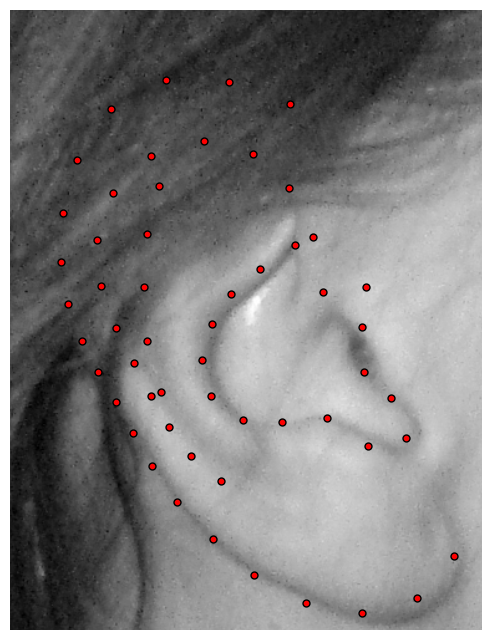

In [7]:
visualize_images(images)

### Build Config

In [8]:
diagonal = 200
max_iters = 24
generative_iter = 5
discriminative_iter = 2
n_processes = 2
noise_percentage=0.02
feature = [dsift] * discriminative_iter
shape_forgetting_factor=0.0
appearance_forgetting_factor=0.5
increament=False
update_shape=False
# feature = [hog] * discriminative_iter

n_levels = 3
n_shape = [5,8,13]
scales = (0.25, 0.5, 1.0)
n_appearance = [0.5,0.5,0.5]
inc_appearance=[0.15, 0.15,0.15]
diagonal=200
model_class=HolisticAAM

### Build Initial Model

#### build initial aam

In [12]:
dsift_paam = mio.import_pickle('/homes/yz4009/wd/PickleModel/aam-ear-dsift-3-level.pkl', encoding='latin1')

In [13]:
initial_aam = dsift_paam

/vol/atlas/homes/yz4009/gitdev/menpofit/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


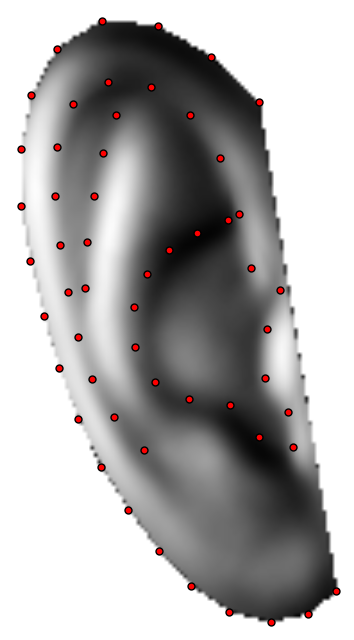

In [14]:
initial_aam.view_aam_widget()

### Automatic Construction

In [8]:
from dAAMs.autoconstruct import auto_construct, generative_construct

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
Using Theano backend.


In [9]:
models = []
errors = []
costs = []

final_aam = auto_construct(
    initial_aam, images, trilist=None, models=models, errors=errors, costs=costs, isplot=True, 
    feature=feature,
    diagonal=diagonal,
    n_processes=n_processes,
    n_appearance=n_appearance, n_shape=n_shape, discriminative_iter=discriminative_iter, generative_iter=generative_iter, 
    inc_appearance=inc_appearance,
    model_class=model_class,
    increament=increament,
    update_shape=update_shape,
    max_iters=max_iters,
#     shape_forgetting_factor=shape_forgetting_factor, appearance_forgetting_factor=appearance_forgetting_factor,
#     export_path='/homes/yz4009/wd/databases/Sketches/fork/temp/ac-paam.pkl',
)

Discriminative Iter: 0, Generative Iter: 0


IOError: bad message length

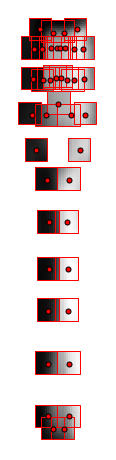

In [30]:
initial_aam.view_aam_widget()

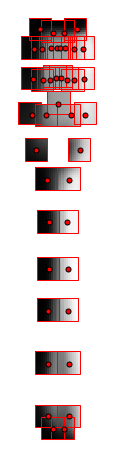

In [31]:
models[-2].view_aam_widget()

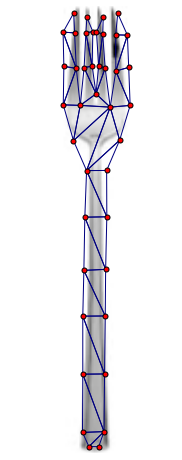

In [32]:
visualize_images(training_imgs)

In [33]:
def view_iterations(img):
    imgs = []
    for i in xrange(9999):
        iter_key = 'iteration_{:03d}'.format(i)
        if iter_key in img.landmarks.keys():
            iter_img = Image(img.pixels)
            iter_img.landmarks['iter'] = img.landmarks[iter_key].lms
            imgs.append(iter_img)
        else:
            break
    visualize_images(imgs)

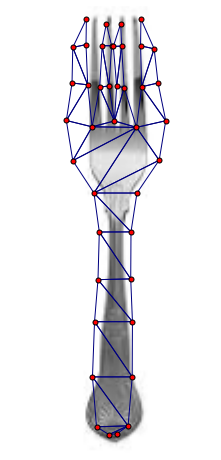

In [34]:
view_iterations(training_imgs[21])

In [35]:
stop here

SyntaxError: invalid syntax (<ipython-input-35-f9ef205a8f26>, line 1)

In [ ]:
mio.export_pickle([training_imgs, models, errors],'/homes/yz4009/wd/PickleModel/AutoConstruct/fork_paam_dsift_mean-0.02-10-inc.pkl', overwrite=True)

In [11]:
((i, np.random.random_integers(1,100,size=(500,500))) for i in xrange(10))

<generator object <genexpr> at 0x7fe2188ec500>

In [16]:
list(([i] for i in range(10)))

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]